<a href="https://colab.research.google.com/github/Trizzole/HelloAI/blob/main/Assignment2_Darkness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# get tensorflow and mnist data
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [2]:
# import numpy
import numpy as np
#undoes text wrap nonsense
np.set_printoptions(linewidth=np.inf)

In [3]:
### "Java" way to do this ###
#retval = minst.load_data()
#X_train = retval[0][0]
#Y_train = retval[0][1]
#X_test = retval[1][0]
#Y_test = retval[1][1]

X_train and Y_Train are the training data
X_test and Y_test are the testing data

X - Inputs
Y - Labels 


In [ ]:
# Get shape of data and individual data entries
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

print(X_train[0].shape)
print(Y_train[0].shape)
print(X_test[0].shape)
print(Y_test[0].shape)

In [ ]:
# Print data entries themselves
print(X_train[0])
print(Y_train[0])
print(X_test[0])
print(Y_test[0])

In [20]:
listof10s = [(x+1)*10 for x in range(10)]
print(listof10s)

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


In [ ]:
# example: pre-process to convert into valid inputs for a neural network
X_train_2d = [x/255.0 for x in X_train]
print(X_train_2d[2])

# example: convert each image into 1d "flattened" vector of inputs
X_train_flat = np.reshape(X_train_2d, (60000,784,1))
print(X_train_flat[2])

In [6]:
# matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# plot 10 random images
import random 
for i in range(10):
  #print(random.randint(0,len(X_train)))
  imgx = X_train[random.randint(0,len(X_train))]
  print(imgx)

In [ ]:
# pick a sample to plot
sample = 1
image = X_train[sample]
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

In [9]:
### from medium, not needed for final results ###
num = 10
images = X_train[:num]
labels = Y_train[:num]

In [10]:
# creates set of 10 random numbers from 0 to length of X_train
from random import randint
randoms = []
for i in range(10):
    randoms.append((randint(0,len(X_train))))
print(randoms)

# assigns random 10 values to the corresponding indecies in X_train and Y_train
images_train = X_train[randoms]
labels_train = Y_train[randoms]


[24298, 48584, 59660, 56409, 16090, 57084, 45246, 37220, 14525, 43205]


In [ ]:
### Plots the 10 random images from train ###
num_train = 10
num_row = 2
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_train):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images_train[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels_train[i]))
plt.tight_layout()
plt.show()

In [12]:
# creates set of 2 random numbers from 0 to length of X_test
from random import randint
randoms = []
for i in range(2):
    randoms.append((randint(0,len(X_test))))
print(randoms)

# assigns random 10 values to the corresponding indecies in X_train and Y_train
images_test = X_test[randoms]
labels_test = Y_test[randoms]

[5345, 8596]


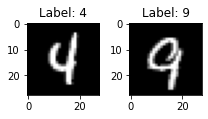

In [13]:
### Plots the 2 random images from test ###
num_test = 2
num_row = 1
num_col = 2
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_test):
    ### change in ax = '...' from train plot ###
    ax = axes[i%num_col]
    ax.imshow(images_test[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels_test[i]))
plt.tight_layout()
plt.show()

In [22]:
# count how many digits are in Y_train
counts = [0]*10
for y in Y_train:
  counts[y] = counts[y] + 1

print(counts)

# count how many digits in Y_test
t_counts = [0]*10
for y in Y_test:
  t_counts[y] = t_counts[y] + 1

print(t_counts)

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]
[980, 1135, 1032, 1010, 982, 892, 958, 1028, 974, 1009]


In [28]:
# create a function that calculates darkness of single image
def calcDarkness(x):
  total = 0
  for r in range(28):
    for c in range(28):
      total = total + x[r][c]
  return total


In [30]:
# test our darkness funciton
print(calcDarkness(X_train[1]))

# will need to use enumerate or zip
# loop through all train images
# get darnkess, assign to right digit
# will need to find average for each
darknesses = [0] * 10
for x, y in zip(X_train, Y_train):
  darkness = calcDarkness(x)
  darknesses[y] = darknesses[y] + darkness

# makes darknesses averages
darknesses = [darknesstotal/counts[i] for i, darknesstotal in enumerate(darknesses)]
darnkesses2 = [dt/cnt for cnt, dt in zip(counts, darknesses)]
print(darknesses)
print(darnkesses2)

31095
[34665.99307783218, 15193.648620587363, 29783.10775427996, 28294.706246941772, 24263.40893529613, 25739.57885998893, 27449.37090233187, 22896.377334397446, 30019.183900188003, 24508.181375021013]
[5.852776140103356, 2.253581818538618, 4.998843194743196, 4.615023038157196, 4.153270957770649, 4.748123752073221, 4.638285046017551, 3.654649215386663, 5.1306074004765, 4.119714468821821]


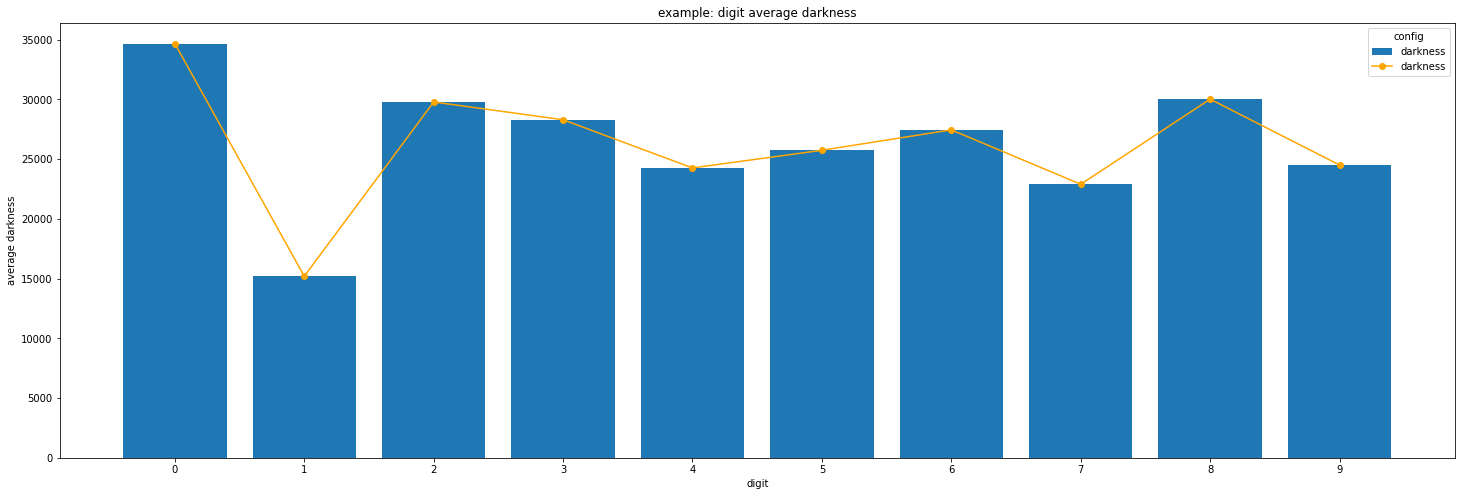

In [17]:
# use matplot lib to plot the average darkness of each digit ... 
# this is NOT part of the assignment, but it gives you some example code for working with matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(25, 8))
digits = [f"{i}" for i in range(10)]
p1 = ax.bar(digits,darknesses, label="darkness")
p2, = ax.plot(digits,darknesses, color='orange', label="darkness", marker='o')
ax.legend(handles=[p1, p2],loc='upper right',title='config') 
ax.set_xlabel("digit")
ax.set_ylabel("average darkness")
plt.title("example: digit average darkness")
plt.show()

In [34]:
def findClosest(darkness):
  diffs = darknesses - darkness
  #print(diffs)
  #print(np.abs(diffs))
  #print(np.min(np.abs(diffs)))
  #print(np.argmin(np.abs(diffs)))
  return np.argmin(np.abs(diffs))

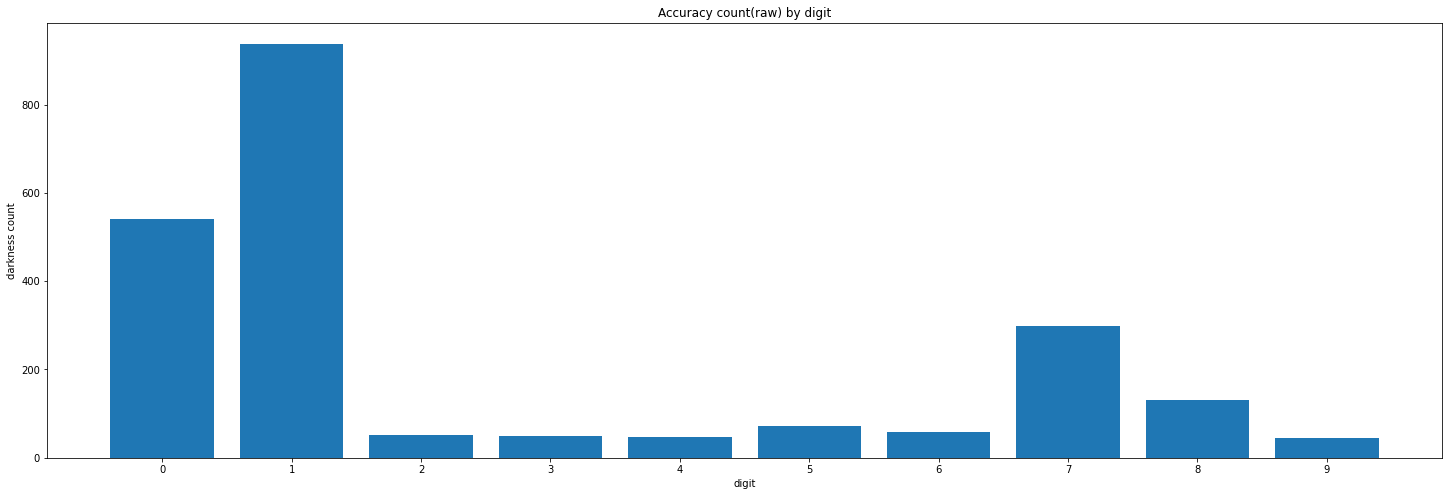

In [44]:
accuracies = [0]*10
for i in range(len(X_test)):
  x = X_test[i]
  label = Y_test[i]
  darknessX = calcDarkness(x)
  predictedLabel = findClosest(darknessX)
  if(Y_test[i] == predictedLabel):
    accuracies[predictedLabel] += 1
# predicted = actual: increment accuricies index
  
  # ... now you should take the darkness you calculated for this image … compare it to  the other “average” darknesses for each digit
  # ... pick the digit that this darkness is closest to
  # ... does that digit match the label? If so, increment a count of how many images you’ve classified correctly ...
  # ... note that there are 10 different accuracy counts (one for each digit, so every time you get a prediction correct, update the appropriate accuracy count)

# now put your pyplot here AFTER the for loop (i.e., not indented)
# use the digits below as the x axis and your accuracies as the y axis

# setup the x-axis
digits = [f"{i}" for i in range(10)] # list comprehension that creates the digits as strings so that they all show up on the x axis

# look at the examples to see how to plot something once you have the x-axis (digits) and the y-axis (accuracies)


fig, ax = plt.subplots(figsize=(25, 8))
digits = [f"{i}" for i in range(10)]
p1 = ax.bar(digits,accuracies, label="accuricies(raw count)") ### turn into accuracies
ax.set_xlabel("digit")
ax.set_ylabel("darkness count")
plt.title("Accuracy count(raw) by digit")
plt.show()